Импортирую необходимые библиотеки для анализа.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

Загружаю и вывожу датасет.

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Строю диаграмму рассеяния для каждой пары признаков, используя Seaborn.

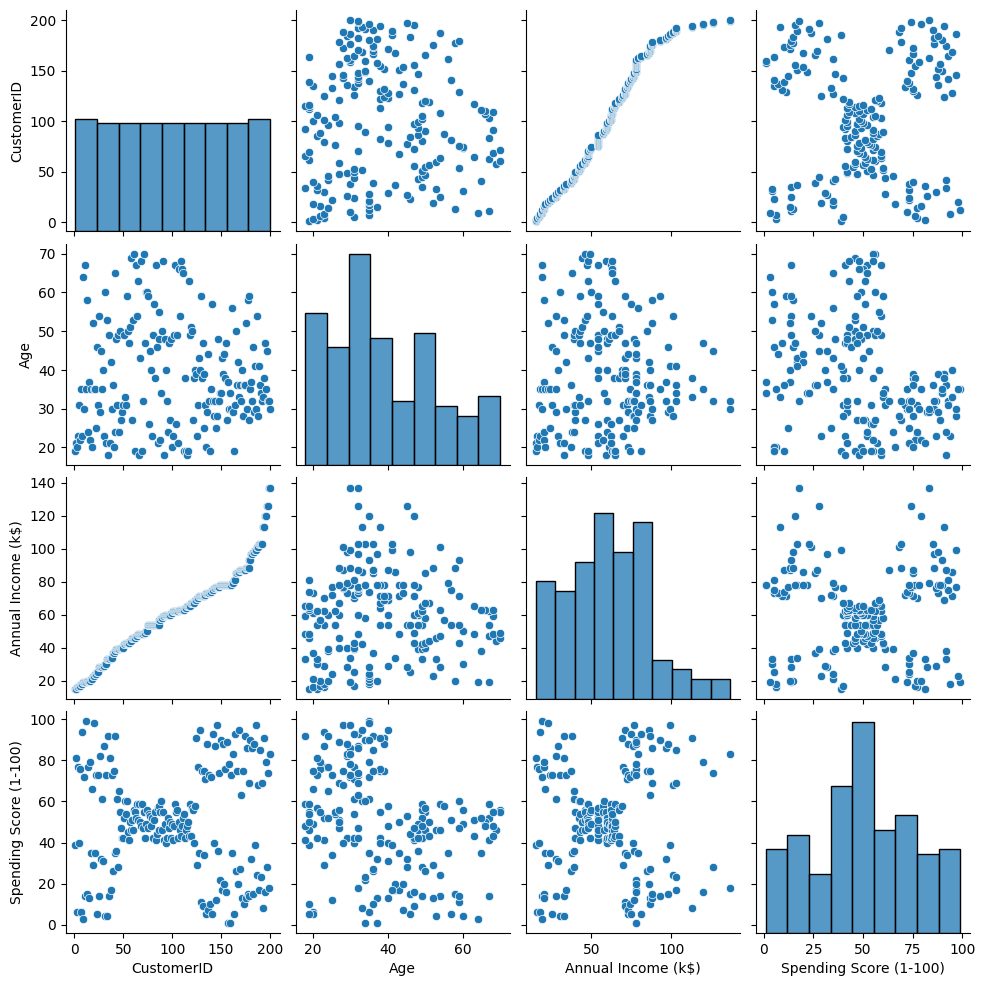

In [7]:
import seaborn as sns

sns.pairplot(dataset)
plt.show()

Проанализировав графики, замечаю, что некоторые признаки имеют сильную корреляцию, такие как Spendig Score и Age, а некоторые - не имеют, такие как Gender и Annual Income. Также вижу, что есть возможность выделения нескольких кластеров.

Для начала, удаляю ненужные признаки, такие как CustomerID и Gender, так как они не являются числовыми.

In [8]:
X = dataset.iloc[:, 2:].values

Использую иерархическую кластеризацию с помощью библиотеки SciPy. Вычисляю матрицу расстояний между парами объектов.

In [9]:
from scipy.spatial.distance import pdist, squareform

dist = pdist(X, metric='euclidean')

Затем использую класс linkage для построения матрицы связей между объектами.

In [10]:
from scipy.cluster.hierarchy import linkage

linkage_matrix = linkage(dist, method='ward')

Теперь, я визуализирую матрицу связей с помощью дендрограммы.

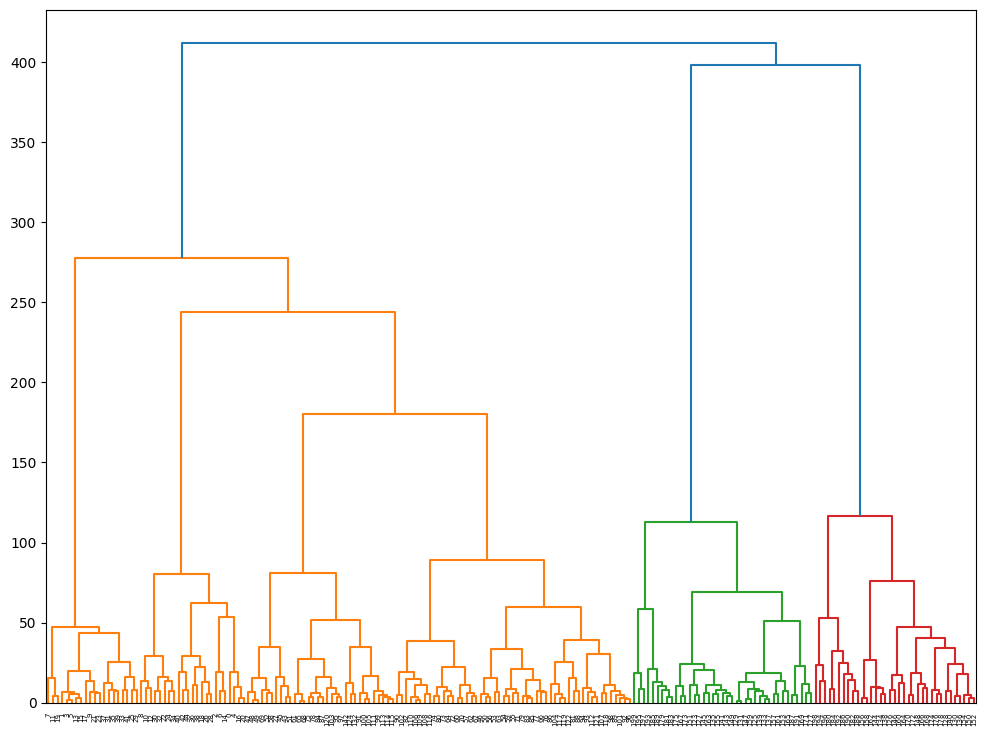

In [11]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(12,9))
dendrogram(linkage_matrix)
plt.show()

На графике вижу, что оптимальное число кластеров для набора данных - 5.

Теперь использую k-средних для разбиения данных на кластеры.

In [12]:
from sklearn.cluster import AgglomerativeClustering

k = 5

clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
clusters = clustering.fit_predict(X)

Наконец, визуализирую полученные кластеры на диаграмме рассеяния.


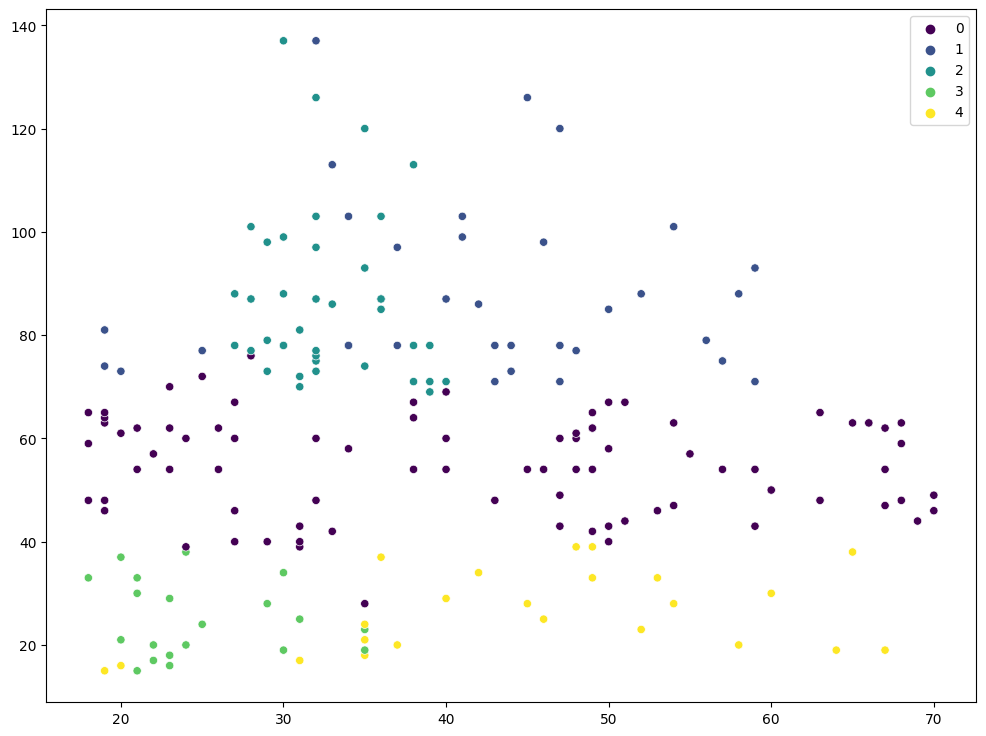

In [13]:
plt.figure(figsize=(12,9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clusters, palette='viridis')
plt.show()

В итоге я вижу, что данные действительно разбиты на 5 кластеров. Каждый кластер имеет свой диапазон значений для Annual Income и Spending Score.

Таким образом, я провел жёсткую иерархическую кластеризацию набора данных Mall Customers на 5 кластеров с помощью дендрограммы.

Импортирую необходимые библиотеки.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Теперь, кластеризация методом k-средних.

Создаю цикл for который проходит от 1 до 10 (включительно), указывая различные значения для числа кластеров.

В каждой итерации создаю объект KMeans с текущим числом кластеров i. Использую параметры init='k-means++' для инициализации центроидов, max_iter=300 для максимального количества итераций, n_init=10 для числа запусков с разными начальными точками, и random_state=0 для повторяемости результатов.

Обучаю модель KMeans на входных данных "X" с использованием метода fit, который находит оптимальные центроиды кластеров.

Значение "WCSS" (Within-Cluster Sum of Squares) для каждого числа кластеров вычисляю с помощью метода inertia_ модели KMeans и добавляю в список wcss.

После завершения цикла строю график с помощью функции plt.plot, где по оси X отображается количество кластеров, а по оси Y - соответствующие значения WCSS.

Добавляю подписи к графику с помощью функций plt.title, plt.xlabel и plt.ylabel.

И вывожу график конечно.

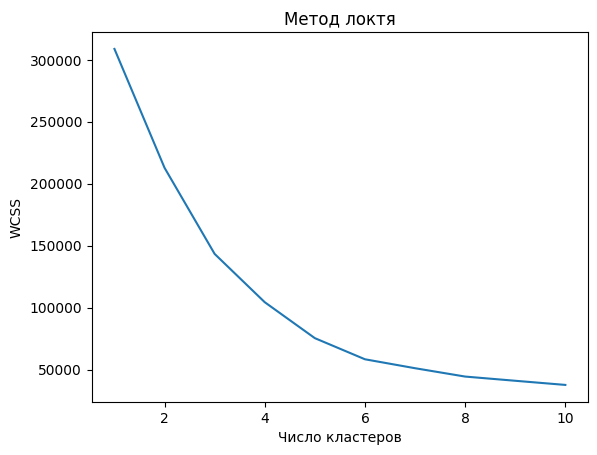

In [15]:
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('WCSS')
plt.show()

Выполняю кластеризацию данных "X" с помощью алгоритма K-Means и присваиваю каждому элементу данных метку соответствующего кластера.

In [16]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

Отображаю результаты кластеризации методом K-Means на графике.

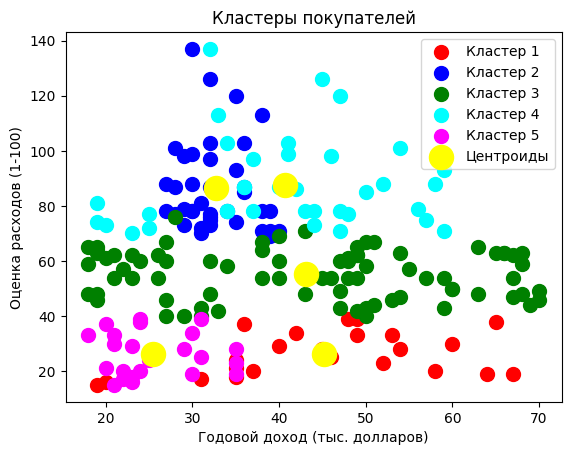

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Кластер 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Кластер 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Кластер 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Кластер 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Кластер 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Центроиды')
plt.title('Кластеры покупателей')
plt.xlabel('Годовой доход (тыс. долларов)')
plt.ylabel('Оценка расходов (1-100)')
plt.legend()
plt.show()

Метод локтя показывает, что оптимальное число кластеров для этого набора данных - 5. Визуализация показывает, что покупатели были разделены на пять кластеров, основанных на их годовом доходе и оценке расходов. Кластеры представлены различными цветами, а центры кластеров обозначены желтыми кругами.